In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Order by n in site
sites = ['USM',
        'SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'SZ2',
        'SZ1',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'NYU',
        'ADHD5',
        'UCLA_DS1']

site_labels = [
'USM                n=30',
'SZ3                  n=31',
'SZ6                  n=35',
'SVIP2              n=36',
'ADHD6            n=39',
'HSJ                  n=39',
'SZ2                  n=41',
'SZ1                  n=42',
'UCLA_CB        n=43',
'SVIP1               n=48',
'UKBB11026      n=50',
'UKBB11027      n=50',
'UKBB11025      n=50',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                  n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',]

p_age = '../../results_reviews/age/model_vars/{}'
p_age_MLPconn = '../../results_reviews/age/'
models = ['MLPconn','deeper','shorter','wider','thinner']

# Load Data

In [4]:
# Single Task
baseline_models = {}
for model in models:
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            if model == 'MLPconn':
                p_parent = os.path.join(p_age_MLPconn, f"{site}/fold_{fold}")
            else:
                p_parent = os.path.join(p_age.format(model), f"{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))
    baseline_models[model] = st_data

In [5]:
# Multi-task
mtl_models = {}
for model in models:
    mtl_data = []
    for fold in range(5):
        if model == 'MLPconn':
            p_parent = os.path.join(p_age_MLPconn, f"all/fold_{fold}")
        else:
            p_parent = os.path.join(p_age.format(model), f"all/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))
    
    mtl_models[model] = mtl_data


# Get Scores

In [8]:
# Single Task
baseline_models_loss = {}
for model in models:
    st_loss = []
    for site in sites:
        st_loss.append([baseline_models[model][site][fold]['Loss/test'].iloc[-1] for fold in range(5)])

    st_loss = pd.DataFrame(st_loss,index=sites)
    st_loss_std = st_loss.std(axis=1)
    st_loss_mean = st_loss.mean(axis=1)

    baseline_models_loss[model] = st_loss_mean

In [9]:
df_base_loss = pd.DataFrame(baseline_models_loss)
df_base_loss['type'] = 'baseline'
df_base_loss

,MLPconn,deeper,shorter,wider,thinner,type
USM,7.534453,7.085751,8.300244,8.358513,7.433180,baseline
SZ3,16.873089,15.968916,15.679517,17.117876,16.356778,baseline
SZ6,10.101161,11.444996,9.908302,11.910384,10.010168,baseline
Svip2,10.841575,10.659651,10.943012,12.037830,11.685528,baseline
ADHD6,0.268546,0.296449,0.291355,0.315437,0.323911,baseline
HSJ,26.912663,28.153823,26.681878,27.053003,27.043695,baseline
SZ2,15.934359,16.925804,14.497610,14.557294,13.798388,baseline
SZ1,14.349425,16.232726,15.491653,20.639503,12.935258,baseline
UCLA_CB,3.819123,3.649549,2.997237,2.783280,2.622574,baseline
Svip1,19.483539,26.933974,26.918566,22.463684,22.511619,baseline


In [11]:
# Multi-task
mtl_models_loss = {}
for model in models:
    mtl_loss = []
    for fold in range(5):
        df = mtl_models[model][fold].transpose().reset_index()
        
        mtl_loss.append(df[df['level_1']=='Loss/test'].set_index('level_0')[99])
        
    mtl_loss = pd.concat(mtl_loss,axis=1)
    mtl_loss_std = mtl_loss.std(axis=1)
    mtl_loss_mean = mtl_loss.mean(axis=1)

    mtl_models_loss[model] = mtl_loss_mean

In [12]:
df_mtl_loss = pd.DataFrame(mtl_models_loss)
df_mtl_loss['type'] = 'mtl'
df_mtl_loss

,MLPconn,deeper,shorter,wider,thinner,type
level_0,,,,,,
ADHD1,0.730325,0.675497,0.317978,0.585358,0.634205,mtl
ADHD3,0.771880,0.369588,0.527619,0.663477,1.064502,mtl
ADHD5,1.131144,1.058315,0.881150,0.985660,1.128100,mtl
ADHD6,0.659141,0.379755,0.552161,0.674324,0.402149,mtl
HSJ,28.716173,29.926289,27.073302,24.643292,19.885814,mtl
NYU,4.840288,6.123272,5.978192,5.781742,5.494783,mtl
SZ1,11.107307,15.938280,10.425322,11.568903,9.012574,mtl
SZ2,8.213397,9.581072,8.036901,8.575979,6.684890,mtl
SZ3,15.237738,21.453689,12.003648,15.466656,14.918929,mtl


In [13]:
df_master = pd.concat([df_mtl_loss,df_base_loss])
df_master

,MLPconn,deeper,shorter,wider,thinner,type
ADHD1,0.730325,0.675497,0.317978,0.585358,0.634205,mtl
ADHD3,0.771880,0.369588,0.527619,0.663477,1.064502,mtl
ADHD5,1.131144,1.058315,0.881150,0.985660,1.128100,mtl
ADHD6,0.659141,0.379755,0.552161,0.674324,0.402149,mtl
HSJ,28.716173,29.926289,27.073302,24.643292,19.885814,mtl
NYU,4.840288,6.123272,5.978192,5.781742,5.494783,mtl
SZ1,11.107307,15.938280,10.425322,11.568903,9.012574,mtl
SZ2,8.213397,9.581072,8.036901,8.575979,6.684890,mtl
SZ3,15.237738,21.453689,12.003648,15.466656,14.918929,mtl
SZ6,11.269245,9.218883,10.196811,12.972093,8.054427,mtl


# Tables

In [14]:
for model in models:
    print(model)
    print(mtl_models_loss[model].mean())
    print(baseline_models_loss[model].mean())
    print()

MLPconn
10.660609908351674
11.4653367988939

deeper
14.17934298142414
12.068654767317788

shorter
10.388860269446619
11.627168791159281

wider
10.40885841306369
11.997530405306264

thinner
8.351372812963847
11.444596483572768



# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39909/3690112308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39909/3690112308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39909/3690112308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39909/3690112308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_39909/3690112308.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])


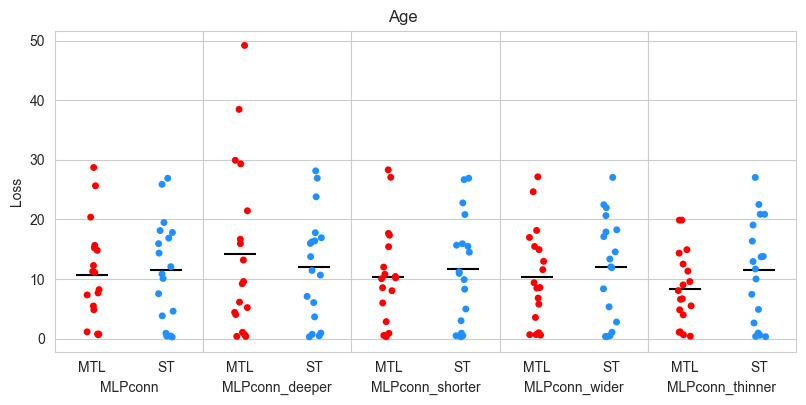

In [16]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,5,figsize=(8,4),sharey=True)
for i, model in enumerate(models):
    sns.stripplot(data=df_master, x='type',y=model,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels(['MTL','ST'])
    if model == 'MLPconn':
        ax[i].set_xlabel(f"MLPconn")
    else:
        ax[i].set_xlabel(f"MLPconn_{model}")
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Loss')

plt.suptitle ('Age')
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/age_model_vars.png'),dpi=300)